In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
import numpy as np
import skfuzzy as fuzz

## Data Representation ##

In [33]:
temp = np.arange(-10, 51, 1)
customers = np.arange(0, 100, 1)

#FUZZIFICATION
t_hot = fuzz.trimf(temp, [22, 50, 50])
t_moderate = fuzz.trimf(temp, [8, 22, 36])
t_cool = fuzz.trimf(temp, [-11, -10, 22])

c_crowded = fuzz.trimf(customers, [55, 100, 101])
c_busy = fuzz.trimf(customers, [0, 60, 100])
c_quiet = fuzz.trimf(customers, [0, 0, 55])

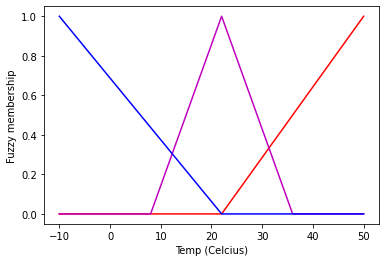

In [34]:
fig, ax = plt.subplots()

ax.plot(temp, t_hot, 'r', temp, t_moderate, 'm', temp, t_cool, 'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Temp (Celcius)')
ax.set_ylim(-0.05, 1.05);

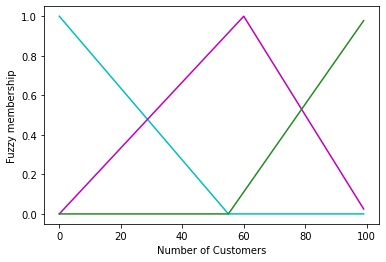

In [35]:
fig, ax = plt.subplots()

ax.plot(customers, c_quiet, 'c', customers, c_busy, 'm', customers, c_crowded, 'ForestGreen')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Number of Customers')
ax.set_ylim(-0.05, 1.05);

## Relationship (Mamdani) ##

In [36]:
R1 = fuzz.relation_min(t_hot, c_quiet)
R2 = fuzz.relation_min(t_moderate, c_crowded)
R3 = fuzz.relation_min(t_cool, c_busy)

R_combined = np.fmax(R1, np.fmax(R2, R3))

## Predictions ##

In [37]:
#DEFUZZIFICATION
fuzz.defuzz(customers, R_combined[temp == 50], 'centroid')

18.333333333333336

In [38]:
predicted_customers = np.zeros_like(temp)

for i in range(len(predicted_customers)):
    predicted_customers[i] = fuzz.defuzz(customers, R_combined[i, :], 'centroid')

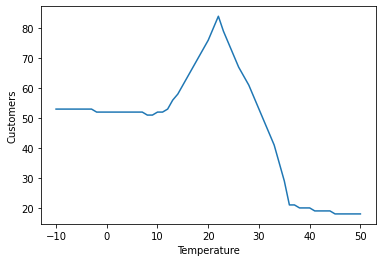

In [39]:
plt.plot(temp, predicted_customers)
plt.xlabel('Temperature')
plt.ylabel('Customers');

## Adding Relations ##

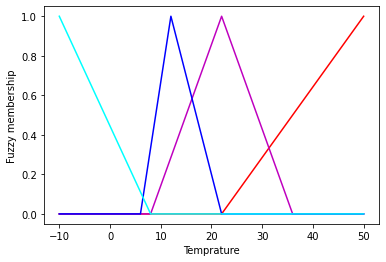

In [41]:
t_hot = fuzz.trimf(temp, [22, 50, 50])
t_moderate = fuzz.trimf(temp, [8, 22, 36])
t_cool = fuzz.trimf(temp, [6, 12, 22])
t_vcool = fuzz.trimf(temp, [-11, -10, 8])


fig, ax = plt.subplots()

ax.plot(temp, t_hot, 'r', temp, t_moderate, 'm', temp, t_cool, 'b', temp, t_vcool, 'cyan')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('Temprature')
ax.set_ylim(-0.05, 1.05);

In [42]:
R1 = fuzz.relation_min(t_hot, c_quiet)
R2 = fuzz.relation_min(t_moderate, c_crowded)
R3 = fuzz.relation_min(t_cool, c_busy)
R4 = fuzz.relation_min(t_vcool, c_quiet)

R_combined = np.fmax(R4, np.fmax(R1, np.fmax(R2, R3)))

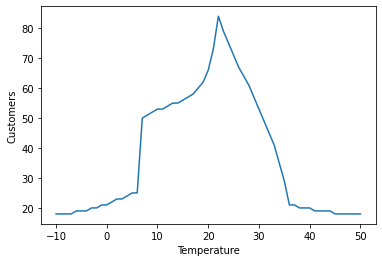

In [43]:
predicted_customers = np.zeros_like(temp)

for i in range(len(predicted_customers)):
    predicted_customers[i] = fuzz.defuzz(customers, R_combined[i, :], 'centroid')
    
plt.plot(temp, predicted_customers)
plt.xlabel('Temperature')
plt.ylabel('Customers');

In [44]:
fuzz.defuzz(customers, R_combined[temp == -10], 'centroid')

18.333333333333336

## Changing Function for Rule Evaluation ##

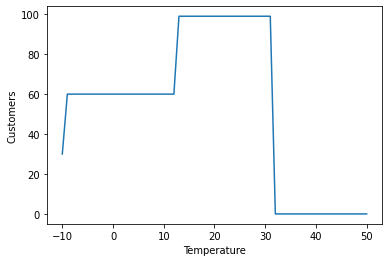

In [26]:
R1 = fuzz.relation_product(t_hot, c_quiet)
R2 = fuzz.relation_product(t_moderate, c_crowded)
R3 = fuzz.relation_product(t_cool, c_busy)
R4 = fuzz.relation_product(t_vcool, c_quiet)

R_combined = np.fmax(R4, np.fmax(R1, np.fmax(R2, R3)))

predicted_customers = np.zeros_like(temp)

for i in range(len(predicted_customers)):
    predicted_customers[i] = fuzz.defuzz(customers, R_combined[i, :], 'mom')
    
plt.plot(temp, predicted_customers)
plt.xlabel('Temperature')
plt.ylabel('Customers');